## Observations and Insights

In [ ]:
There was an even distribution between male & female mice.

Based on the high correlation between mouse weight & tumor volume, its evident that the chances of tumor growth alongside weight gain is high. 

In [1]:
## Dependencies and starter code
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Check to make sure they merged
merged_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
# Group the dataframe by drug regimen & create a variable for tumor volume by regimen
regimen_df = merged_df.groupby("Drug Regimen")
tumor_vol = regimen_df["Tumor Volume (mm3)"]

# Calculate required stats
count = tumor_vol.count()
mean = tumor_vol.mean()
median = tumor_vol.median()
variance = tumor_vol.var()
std_dev = tumor_vol.std()
sem = tumor_vol.sem()

# Create a df for the stats
tumor_size_df = pd.DataFrame({
    "Count" : count,
    "Mean" : mean,
    "Median" : median,
    "Variance" : variance,
    "Standard Deviation" : std_dev,
    "SEM" : sem
})

tumor_size_df.sort_values("Mean")


,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

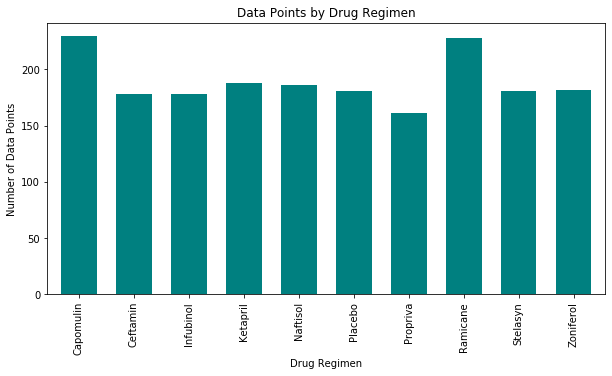

In [5]:
tumor_size_df["Count"].plot(kind = "bar", figsize=(10,5), color='teal',title = "Data Points by Drug Regimen", width = .65)
plt.ylabel("Number of Data Points")
plt.savefig('Resources/DataptsPerTreatment_PandasBarChart.png', dpi=200, bbox_inches='tight')
plt.show()

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

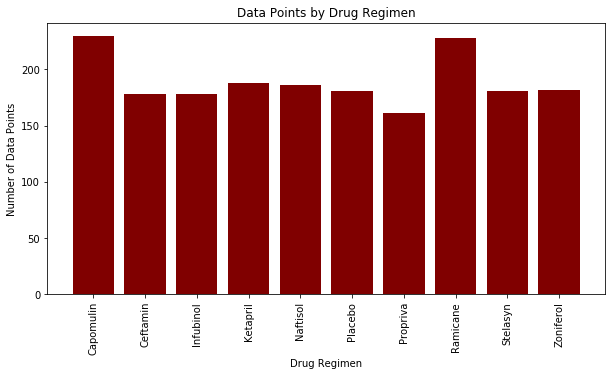

In [9]:
x_axis = np.arange(len(tumor_size_df))
plt.figure(figsize=(10,5))
plt.bar(x_axis,count,color='maroon')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points by Drug Regimen")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, tumor_size_df.index.tolist(), rotation = 90)
plt.savefig('Resources/DataptsPerTreatment_PyplotBarChart.png', dpi=200, bbox_inches='tight')
plt.show()

## Pie plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

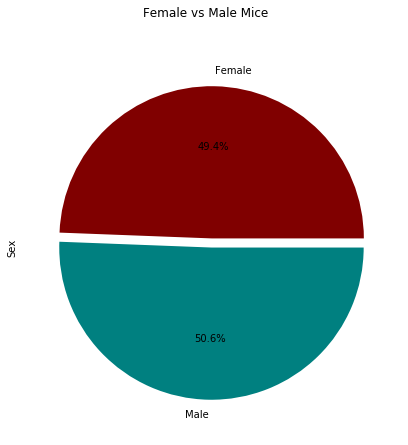

In [51]:
# Create a dataframe by grouping the 'sex' column   
genders_df = merged_df.groupby('Sex')

# Get number of data points for each gender
genderCount = pd.DataFrame(genders_df['Sex'].count())

# Create pie chart for each sex using DataFrame.plot()
explode = (0.06,0)
genderCount.plot(kind='pie',
    subplots=True,
    explode=explode,
    autopct='%1.1f%%',
    title='Female vs Male Mice',
    colors=['maroon','teal'],
    legend=False,
    figsize=(7,7))
#plt.axis('equal')
plt.savefig('Resources/FemalevsMale_PandasPieChart.png', dpi=200, bbox_inches='tight')
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

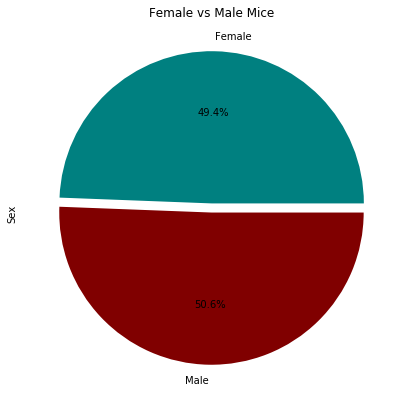

In [60]:
#Get list of index values in the groupby df for (this will show 'Male' & 'Female')
genders2_df = list(genderCount.index.values)

#Appoint values for the sections of the pie chart (counts each gender)
genderCount2 = genderCount['Sex']

# Generate pylot pie chart for female vs male mice
plt.figure(figsize=(7,7))
explode = (0.06,0)
plt.pie(genderCount2,labels=genders2_df,colors=['teal','maroon'],autopct='%1.1f%%',explode=explode)
plt.title('Female vs Male Mice')
plt.ylabel('Sex')
plt.savefig('Resources/FemalevsMale_PyplotPieChart.png', dpi=200, bbox_inches='tight')
plt.show()

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

In [62]:
# Create a dataframe to pull out the top four treatments
final_tumor = merged_df.loc[:,["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor = final_tumor[final_tumor["Timepoint"] ==45]

final_tumor_treatment = final_tumor[final_tumor["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


final_tumor_treatment.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472


In [82]:
# Calculate IQR, see if there's any outliers

# Use numpy to generate quartiles & calculate IQR (interquartile range)
qlow = np.percentile (final_tumor_treatment["Tumor Volume (mm3)"], 25)
qhigh = np.percentile(final_tumor_treatment["Tumor Volume (mm3)"],75)
iqr = (qhigh-qlow)
print(f"The IQR of tumor volume is: {iqr}")

# Determine if there are outliers
lower_bound = qlow - (1.5*iqr)
upper_bound = qhigh + (1.5*iqr)
print(f"There are no outliers in this dataframe")

The IQR of tumor volume is: 28.66218635
There are no outliers in this dataframe


In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

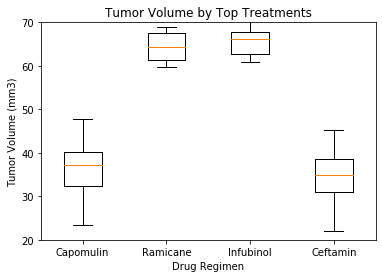

In [116]:
drug_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a list for each drug regimen to show Tumor Volume for treatment and put into a dataframe
tumor_list = final_tumor_treatment.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumorList_df = pd.DataFrame(tumor_list)
tumor_volume = [Tvol for Tvol in tumorList_df['Tumor Volume (mm3)']]

# Plot that dataframe into a boxplot
plt.boxplot(tumor_volume, labels=drug_labels)
plt.title("Tumor Volume by Top Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20, 70)
plt.savefig('Resources/FinalTumorVolumeByRegimen_Boxplot.png', dpi=200, bbox_inches='tight')
plt.show()

In [108]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

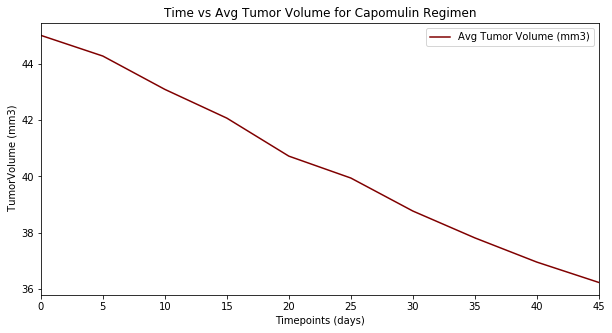

In [123]:
#Create a groupby for Capomulin over time
capomulin_df = merged_df[merged_df["Drug Regimen"] == "Capomulin"]
capomulinxTime_df = capomulin_df.groupby("Timepoint")
#Create dataframe to use for lineplot
avg_vol = capomulinxTime_df["Tumor Volume (mm3)"].mean()
capomulin_vol_df = pd.DataFrame({"Avg Tumor Volume (mm3)": avg_vol})
#Create lineplot
capomulin_vol_df.plot(kind="line",color='maroon',figsize=(10,5))
plt.title("Time vs Avg Tumor Volume for Capomulin Regimen")
plt.ylabel(" TumorVolume (mm3)")
plt.xlabel("Timepoints (days)")
plt.savefig('Resources/TimevsTumorVolume_Lineplot.png', dpi=200, bbox_inches='tight')
plt.show()

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [129]:
#FIRST:
# Groupby Mouse ID
# #Use .agg() method & get the weight and mean of tumor volume
mouse_id = capomulin_df.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        avg_vol=('Weight (g)', np.mean),\
        # Get the standard error of mean (SEM) of the 'Tumor Volume (mm3)' column
        vol_sem=('Tumor Volume (mm3)', np.mean)\
).round(3)
mouse_id.head(5)

,avg_vol,vol_sem
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613


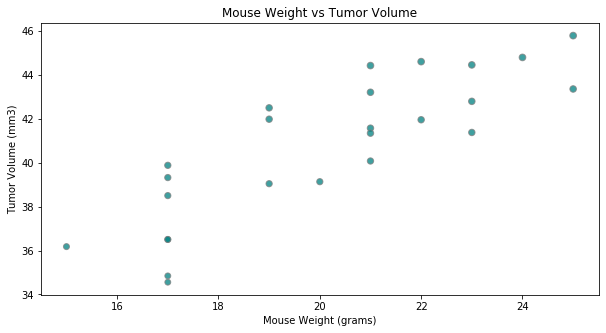

In [144]:
# SECOND:
# Create scatter plot from df above
plt.figure(figsize=(10,5))
plt.scatter(
    mouse_id['avg_vol'],
    mouse_id['vol_sem'],
    marker='o',
    facecolors='teal',
    edgecolors='gray',
    s=mouse_id['vol_sem'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse Weight vs Tumor Volume")
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Tumor Volume (mm3)")

# Save the figure
plt.savefig('Resources/MouseWeightvsTumorSz_Scatterplot.png', dpi=200)
plt.show()

In [145]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_id['avg_vol'],mouse_id['vol_sem'])
print(f"Weight & Tumor Size Correlation: {round(correlation[0],2)}")

Weight & Tumor Size Correlation: 0.84


Weight & Tumor Size Correlation: 0.84
R-squared value: 0.8419461020261081
Linear equation: y = 0.95x + 21.55


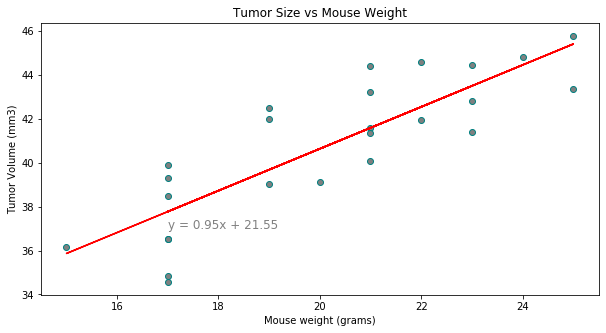

In [160]:
#already imported linregress from scipy.stats

correlation = st.pearsonr(mouse_id['avg_vol'],mouse_id['vol_sem'])
print(f"Weight & Tumor Size Correlation: {round(correlation[0],2)}")

# Print the r-squared value inside the chart
x_values = mouse_id['avg_vol']
y_values = mouse_id['vol_sem']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Finish making the chart
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker='o',facecolors='gray',edgecolors='teal',alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=12,color="gray")
plt.title("Tumor Size vs Mouse Weight")
plt.xlabel("Mouse weight (grams)")
plt.ylabel("Tumor Volume (mm3)")
print(f"R-squared value: {rvalue}")
print(f"Linear equation: {line_eq}")

# Save the figure
plt.savefig('Resources/CorrelationCoefficient_LinearRegression_weightVStumorvol.png', dpi=200)
plt.show()